# Python ML Example with Keras
(based on https://elitedatascience.com/keras-tutorial-deep-learning-in-python)

### Why Keras?

- Keras recommended library for deep learning in Python, especially for beginners. - Its minimalistic, modular approach makes it a breeze to get deep neural networks up and running.
- You can read more about it here:

https://elitedatascience.com/python-deep-learning-libraries#keras

### What is Deep Learning?

- **Deep learning** refers to neural networks with multiple hidden layers that can learn increasingly abstract representations of the input data.
    - This is obviously an oversimplification, but it’s a practical definition for us right now.

- For example, deep learning has led to major advances in computer vision.
- We’re now able to classify images, find objects in them, and even label them with captions.
- To do so, deep neural networks with many hidden layers can sequentially learn more complex features from the raw input image:
    - The first hidden layers might only learn local edge patterns.
    - Then, each subsequent layer (or filter) learns more complex representations.
    - Finally, the last layer can classify the image as a cat or kangaroo.
- These types of deep neural networks are called **Convolutional Neural Networks**.

### What are Convolutional Neural Networks?

- Convolutional Neural Networks (CNN’s) are multi-layer neural networks (sometimes up to 17 or more layers) that assume the input data to be images.

![](Images/neural_net2.jpeg)

![](Images/cnn.jpeg)

![](Images/typical_cnn_architecture.png)

- By making this requirement, CNN’s can drastically reduce the number of parameters that need to be tuned.
- Therefore, CNN’s can efficiently handle the high dimensionality of raw images.

- Their underlying mechanics are beyond the scope of this tutorial.
  (https://cs231n.github.io/convolutional-networks/)

### What we can't offer in this tutorial...

- This is not a complete course on deep learning.
- Instead, this tutorial is meant to get you from zero to your first Convolutional Neural Network with as little headache as possible!
- It demonstrates the power of Python and serves as an use case example for Python.

# 7 Steps towards a first CNN

### Step 1: Import libraries

- Let’s start by importing matplotlib and numpy. 
- Then set a seed for the computer’s pseudorandom number generator. 

In [28]:
import matplotlib
import numpy as np
np.random.seed(123)

- Next, we’ll import the Sequential model type from Keras.
- This is simply a linear stack of neural network layers.
- It’s perfect for the type of feed-forward CNN we’re building in this tutorial.

In [29]:
from keras.models import Sequential

- Next, let’s import the “core” layers from Keras.
- These are the layers that are used in almost any neural network:

In [30]:
from keras.layers import Dense, Dropout, Activation, Flatten

- Then, we’ll import the CNN layers from Keras.
- These are the convolutional layers that will help us efficiently train on image data:

In [31]:
from keras.layers import Convolution2D, MaxPooling2D

- Finally, we’ll import some utilities. This will help us transform our data later:

In [32]:
from keras.utils import np_utils

### Step 2: Load image data from MNIST.

- MNIST is a great dataset for getting started with deep learning and computer vision.
- It’s a big enough challenge to warrant neural networks, but it’s manageable on a single computer.
- That makes it perfect for this Keras tutorial.

- The Keras library conveniently includes it already. We can load it like so:

In [33]:
from keras.datasets import mnist
 
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [34]:
print( X_train.shape )

(60000, 28, 28)


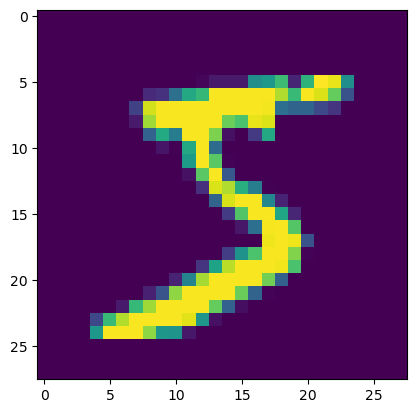

In [35]:
from matplotlib import pyplot as plt
plt.imshow(X_train[0])

In [36]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [37]:
print( X_train.shape )
# (60000, 28, 28, 1)

(60000, 28, 28, 1)


In [38]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [39]:
print( y_train.shape )
# (60000,)

(60000,)


In [40]:
print( y_train[:10] )
# [5 0 4 1 9 2 1 3 1 4]

[5 0 4 1 9 2 1 3 1 4]


In [41]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [42]:
print( Y_train.shape )
# (60000, 10)

(60000, 10)


In [43]:
model = Sequential()

In [44]:
model.add(Convolution2D(32, (3,3), activation='relu', input_shape=(28,28,1)))


In [45]:
print( model.output_shape )
# (None, 26, 26, 32)

(None, 26, 26, 32)


In [46]:
model.add(Convolution2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [47]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [48]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [49]:
model.fit(X_train, Y_train, 
          batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1677/1875 [=========================>....] - ETA: 12s - loss: 0.2135 - accuracy: 0.9345

KeyboardInterrupt: 

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [ ]:
print(score)